In [31]:
#Leer datos
import pandas as pd

inc = pd.read_csv('incident_angle_030347.txt', sep="\t", header=1)
trans = pd.read_csv('refraction_trans_ang_030333.txt', sep="\t", header=1)

In [32]:
#Mostrar tabla Ángulos incidencia
inc

,t,θ
0,0.000000,170.279427
1,0.100100,168.282275
2,0.200200,168.630136
3,0.300300,167.099544
4,0.400400,164.158466
...,...,...
167,16.717745,91.336843
168,16.817856,90.095768
169,16.917967,91.116299
170,17.018067,89.826581


In [33]:
#Mostrar tabla Ángulos transmisión
trans

,t,θ
0,0.000000,0.000000
1,0.100100,0.000000
2,0.200200,0.000000
3,0.300300,0.000000
4,0.400400,0.000000
...,...,...
167,16.717745,-83.600862
168,16.817856,-84.216104
169,16.917967,-85.025635
170,17.018067,-85.847737


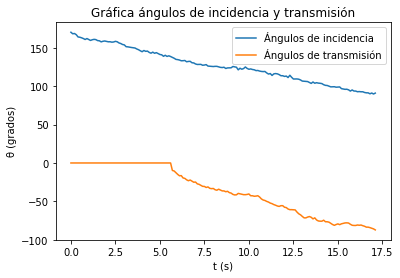

In [34]:
import matplotlib.pyplot as plt

#Gráficas
plt.plot(inc['t'], inc['θ'], label="Ángulos de incidencia")
plt.plot(trans['t'], trans['θ'], label='Ángulos de transmisión')
plt.xlabel('t (s)')
plt.ylabel('θ (grados)')
plt.title('Gráfica ángulos de incidencia y transmisión')
plt.legend()
plt.savefig("Grafica_angulos.png")

In [35]:
import numpy as np

#Elección de ángulos
ang_inc = (inc["θ"][57:] - 90) * np.ones(len(inc["θ"][57:]))
ang_trans = trans["θ"][57:] + 90

'El indice de refracción obtenido es n=1.3398'

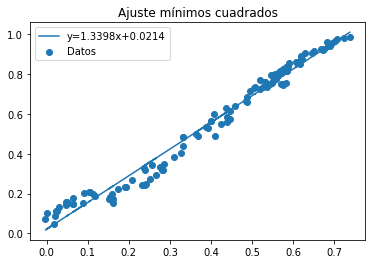

In [36]:
#Ajuste
import actividad7_202110363 as formulas
import numpy as np

sin_x = np.sin((ang_inc * np.pi) / 180)
sin_y = np.sin((ang_trans * np.pi) / 180)
fit = formulas.ajuste(sin_x, sin_y)

#Gráfica ajuste
import matplotlib.pyplot as plt

plt.scatter(sin_x, sin_y, label="Datos")
plt.plot(sin_x, formulas.valor_y(sin_x, sin_x, sin_y),label=fit)
plt.legend(loc="upper left")
plt.title("Ajuste mínimos cuadrados")
plt.savefig("Ajuste.png")

#Conclusiones
f"El indice de refracción obtenido es n={round(formulas.pendiente(sin_x, sin_y),4)}"

In [51]:
x = np.ones((len(sin_x)))
np.append(x, sin_x.values, axis=0)
print(x)
def ajuste_matricial(x,y):
    xt = np.transpose(x)
    return np.transpose((xt @ x)) @ xt @ y


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
